In [13]:
import pandas as pd
import networkx as nx
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
datos_nodo=pd.read_csv('datos_nodo_prueba.csv')
datos_nodo.head()

,nombre,ciudad
0,A,Mexico
1,B,Hidalgo
2,C,Veracruz
3,D,Yucatan
4,E,Oaxaca


In [45]:
datos_nodo.set_index("nombre",inplace=True)
datos_nodo.head()

,ciudad
nombre,
A,Mexico
B,Hidalgo
C,Veracruz
D,Yucatan
E,Oaxaca


In [46]:
rutas_nodo=pd.read_csv('nodos_prueba.csv')
rutas_nodo.head()

,origen,destino,peso
0,A,B,1
1,A,C,6
2,B,C,3
3,B,E,6
4,B,D,4


In [47]:
DG=nx.DiGraph()
for filas in rutas_nodo.iterrows():
    DG.add_edge(filas[1]["origen"],
                filas[1]["destino"],
                peso=filas[1]["peso"])
DG.nodes(data=True)

NodeDataView({'A': {}, 'B': {}, 'C': {}, 'E': {}, 'D': {}, 'F': {}})

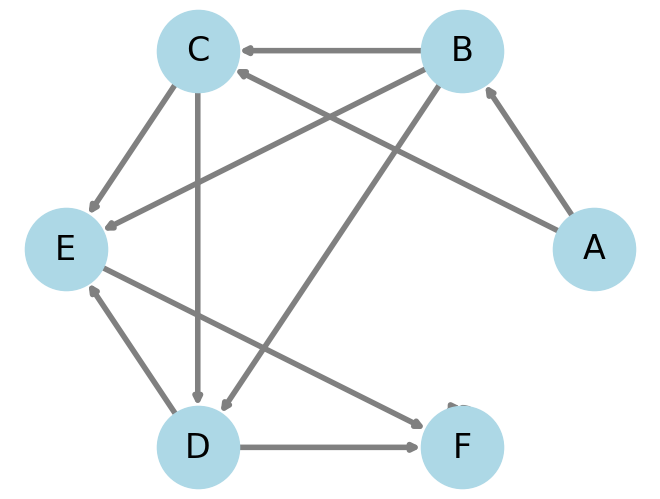

In [48]:
nx.draw_circular(DG,
                node_color='lightblue',
                edge_color='gray',
                font_size=24,
                width=4,with_labels=True,node_size=3500,)


In [49]:
list(nx.all_shortest_paths(DG,source="A",target="F",weight=None))

[['A', 'B', 'E', 'F'],
 ['A', 'C', 'E', 'F'],
 ['A', 'B', 'D', 'F'],
 ['A', 'C', 'D', 'F']]

In [50]:
list(nx.dijkstra_path(DG,source="A",target="F",weight=None))

['A', 'B', 'E', 'F']

In [51]:
list(nx.dijkstra_path(DG,source="A",target="F",weight="peso"))

['A', 'B', 'D', 'F']

In [57]:
datos_nodo.loc["B"]["ciudad"]

'Hidalgo'

In [53]:
def ruta(ruta):
    total_peso=0
    for i in range(len(ruta)-1):
        origen=ruta[i]
        destino=ruta[i+1]
        peso=DG[origen][destino]["peso"]
        total_peso=total_peso+peso
        print(" %s->%s\n Peso: %s " % 
              (datos_nodo.loc[origen]['ciudad'],
               datos_nodo.loc[destino]['ciudad'],peso))
    print("\n Peso total=%s"%(total_peso))

In [54]:
ruta(['A', 'B', 'E', 'F'])

 Mexico->Hidalgo
 Peso: 1 
 Hidalgo->Oaxaca
 Peso: 6 
 Oaxaca->Quintana Roo
 Peso: 4 

 Peso total=11
